01

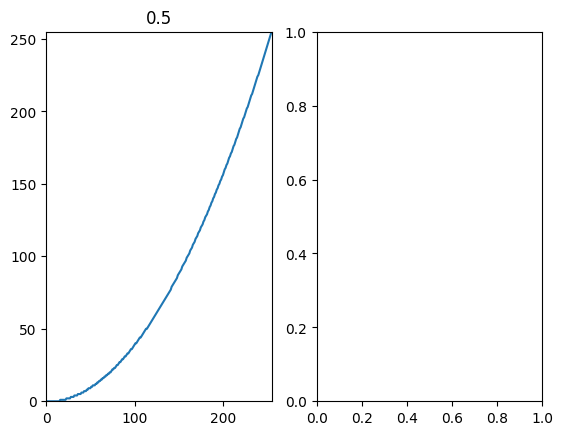

In [2]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
src = cv2.imread('img/Aerial.bmp', 0)

def oresen(k):
    curve = k * np.arange(0, 256)
    curve = curve.clip(0, 255)
    return curve.astype(np.uint8)

def gamma_curve(gamma):
    curve = np.arange(0, 256)
    curve = 255 * np.power(curve / 255, 1/gamma)
    return curve.astype(np.uint8)

cv2.imshow("src", src)


curve1 = gamma_curve(0.5)
dst = cv2.LUT(src, curve1)
cv2.imshow("gamma 0.5", dst)

plt.subplot(121)
plt.plot(curve1), plt.title("0.5")
plt.xlim(0, 255), plt.ylim(0, 255)
plt.subplot(122)

cv2.waitKey(0)
cv2.destroyAllWindows()

02

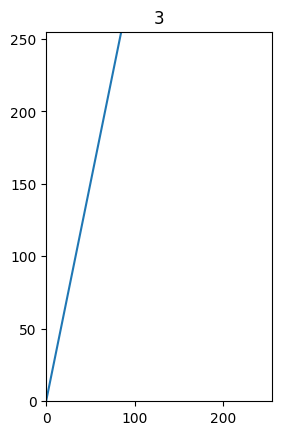

In [3]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np


def oresen(k):
    curve = k * np.arange(0, 256)
    curve = curve.clip(0, 255)
    return curve.astype(np.uint8)

cv2.imshow("src", src)

# dst 3
curve1 = oresen(3)
dst = cv2.LUT(src, curve1)
cv2.imshow("dst 3", dst)

plt.subplot(121)
plt.plot(curve1), plt.title("3")
plt.xlim(0, 255), plt.ylim(0, 255)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


03

In [18]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("img/Parrots.bmp")

height = img.shape[0]
width = img.shape[1]

center = (int(width/2), int(height/2))
trans = cv2.getRotationMatrix2D(center, 45.0, 1.0)

new_height = int(height * np.sqrt(2))
new_width = int(width * np.sqrt(2))

trans[0, 2] += (new_width - width) // 2
trans[1, 2] += (new_height - height) // 2

dst = cv2.warpAffine(img, trans, (new_width, new_height), flags = cv2.INTER_CUBIC)

cv2.imshow("src", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

04

In [19]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("img/Parrots.bmp")

h, w, c = img.shape
src_pts = np.array([[0, 0], [0, h], [w, h], [w, 0]], dtype=np.float32)

# pattern-0
dst_pts = np.array([[20,10], [10, h-20], [w-20, h-30], [w-40, 30]], dtype=np.float32)
perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(img, perspective_matrix, (w, h))
cv2.imshow("dst1", dst)


cv2.imshow("src", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

05

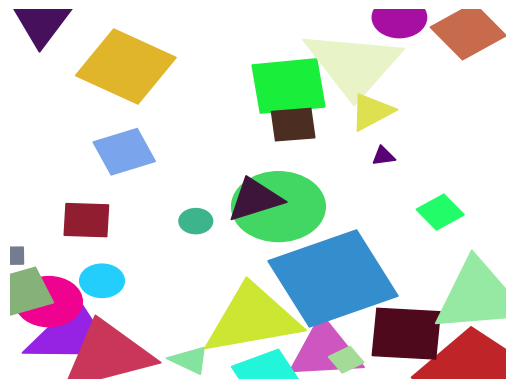

In [36]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import random

# 描画領域の設定
fig, ax = plt.subplots()
ax.set_facecolor('black')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

positions = []

# 三角形を描画する関数
def draw_triangle(ax, center, size):
    triangle = plt.Polygon([
        (center[0], center[1] + size),
        (center[0] - size, center[1] - size),
        (center[0] + size, center[1] - size)
    ], color=np.random.rand(3,))
    t = transforms.Affine2D().rotate_deg_around(center[0], center[1], random.uniform(0, 180)) + ax.transData
    triangle.set_transform(t)
    ax.add_patch(triangle)

# 四角形を描画する関数
def draw_square(ax, center, size):
    square = plt.Rectangle(
        (center[0] - size, center[1] - size),
        2 * size, 2 * size,
        color=np.random.rand(3,)
    )
    t = transforms.Affine2D().rotate_deg_around(center[0], center[1], random.uniform(0, 180)) + ax.transData
    square.set_transform(t)
    ax.add_patch(square)

# 丸を描画する関数
def draw_circle(ax, center, size):
    circle = plt.Circle(center, size, color=np.random.rand(3,))
    ax.add_patch(circle)

# ランダムに図形を配置する
for _ in range(30):  # 30個の図形を配置
    shape_type = random.choice(['triangle', 'square', 'circle'])

    while True:
        # 重ならないように位置を決定
        center = (random.uniform(0, 100), random.uniform(0, 100))
        size = random.uniform(2, 10)
        is_overlapped = False
        for pos in positions:
            if np.linalg.norm(np.array(pos[:2]) - np.array(center)) < size + pos[2]:
                is_overlapped = True
                break
        if not is_overlapped:
            positions.append((center[0], center[1], size))
            break
        center = (random.uniform(0, 100), random.uniform(0, 100))
    size = random.uniform(2, 10)
    
    if shape_type == 'triangle':
        draw_triangle(ax, center, size)
    elif shape_type == 'square':
        draw_square(ax, center, size)
    elif shape_type == 'circle':
        draw_circle(ax, center, size)

# 描画を表示
plt.axis('off')
plt.show()

06

In [35]:
%reset -f
import numpy as np
import cv2

img = cv2.imread("img/Sailboat.bmp")
cv2.imshow("src", img)

height, width, channel = img.shape
mask = np.zeros((height, width, channel), np.uint8)
cv2.rectangle(mask, (120, 120), (180, height), (255, 255, 255), thickness=-1)
# cv2.imshow("mask", mask)

dst1 = cv2.bitwise_or(img, mask)
cv2.imshow("AND", dst1)

cv2.waitKey(0)
cv2.destroyAllWindows()

07

In [1]:
%reset -f
import numpy as np
import cv2

base = cv2.imread("img/Sailboat.bmp")
height, width, channel = base.shape

img = np.zeros((height, width, channel), np.uint8)
cv2.circle(img, (150, 150), 100, (255, 255, 255), thickness=-1)

mask = np.zeros((height, width, channel), np.uint8)

dst1 = cv2.bitwise_or(img, mask)
cv2.imshow("AND", dst1)

cv2.waitKey(0)
cv2.destroyAllWindows()

08

In [3]:
%reset -f
import numpy as np
import cv2

img1 = cv2.imread("img/Parrots.bmp")
img2 = cv2.imread("img/Lenna.bmp")
img3 = cv2.imread("img/Mandrill.bmp")
img4 = cv2.imread("img/Aerial.bmp")

vconcat1 = cv2.vconcat([img1, img2])
cv2.imshow("vconcat1", vconcat1)

vconcat2 = cv2.vconcat([img3, img4])
cv2.imshow("vconcat2", vconcat2)

hconcat_img = cv2.hconcat([vconcat1, vconcat2])
cv2.imshow("hconcat", hconcat_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

09

In [2]:
%reset -f
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    res,th1 = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow("frame", th1)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

10

In [2]:
%reset -f
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    th1 = cv2.adaptiveThreshold(frame_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 5)
    cv2.imshow("frame", th1)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()